# Wine Project Report

We are going to use a Wine data set to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

Target: Using chemical analysis determine the origin of wines.

Link to data source and data details: http://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
import csv
import os
import numpy as np
np.set_printoptions(suppress=True)
import random
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import seaborn as sns

The following codes make output result in more standard format and do not affect numerical result.

In [2]:
np.set_printoptions(suppress=True) # always print floating point numbers using fixed point notation
plt.rcParams['savefig.dpi'] = 50 # (DPI/Image resolution)
plt.rcParams['figure.dpi'] = 50 #

Since the last column *Customer_Segment* is labeled (**qualitative**) data while all other columns are unlabeled (**quantitative**) data, which are not suitable for aggregated analysis or modelling since some machine learning algorithm like *k-means* only support unlabeled data. So we first try to use pandas to read the original csv file, and save only the relevant columns to a new csv file

In [3]:
fname_in = '/Users/alvis/Desktop/6756 Project 1/Wine.csv'
fname_out = 'Wine_del.csv'

f_in = pd.read_csv(fname_in)
f_in.iloc[:, :13].to_csv(fname_out)

We first read in the raw data for analysis by using command `pd.read_csv()`

In [4]:
wine = pd.read_csv(fname_out, index_col=0)
wine.head()
#wine

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

## TODO: add introduction to data 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The data set has around 13 variables as the following shows.

This is the new data with *Customer_Segment* column dropped. We can use `df.dtypes` to see the data type of all columns (since all data in each column/category are supposed to have consistent data type).

In [5]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

`df.describe()` method helps to draw a basic description on the data by calculating some basic statistics on each column, such as total valid number of data (we can see all data has 178 entries, so no missing or invalid data for this dataset), mean, median, standard deviation, mininum, maximum, first & third quartile.

In [6]:
wine.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

We can draw histogram for each column

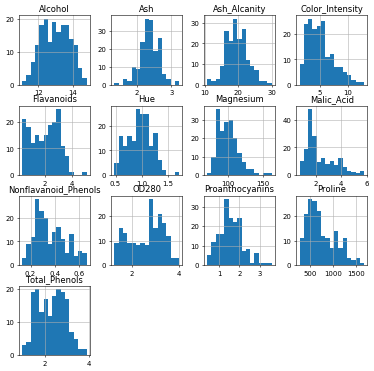

In [7]:
wine.hist(figsize=(9,9),bins=15, layout=(4,4))
plt.savefig('histogram.png')
plt.show()

# Some More Exploration

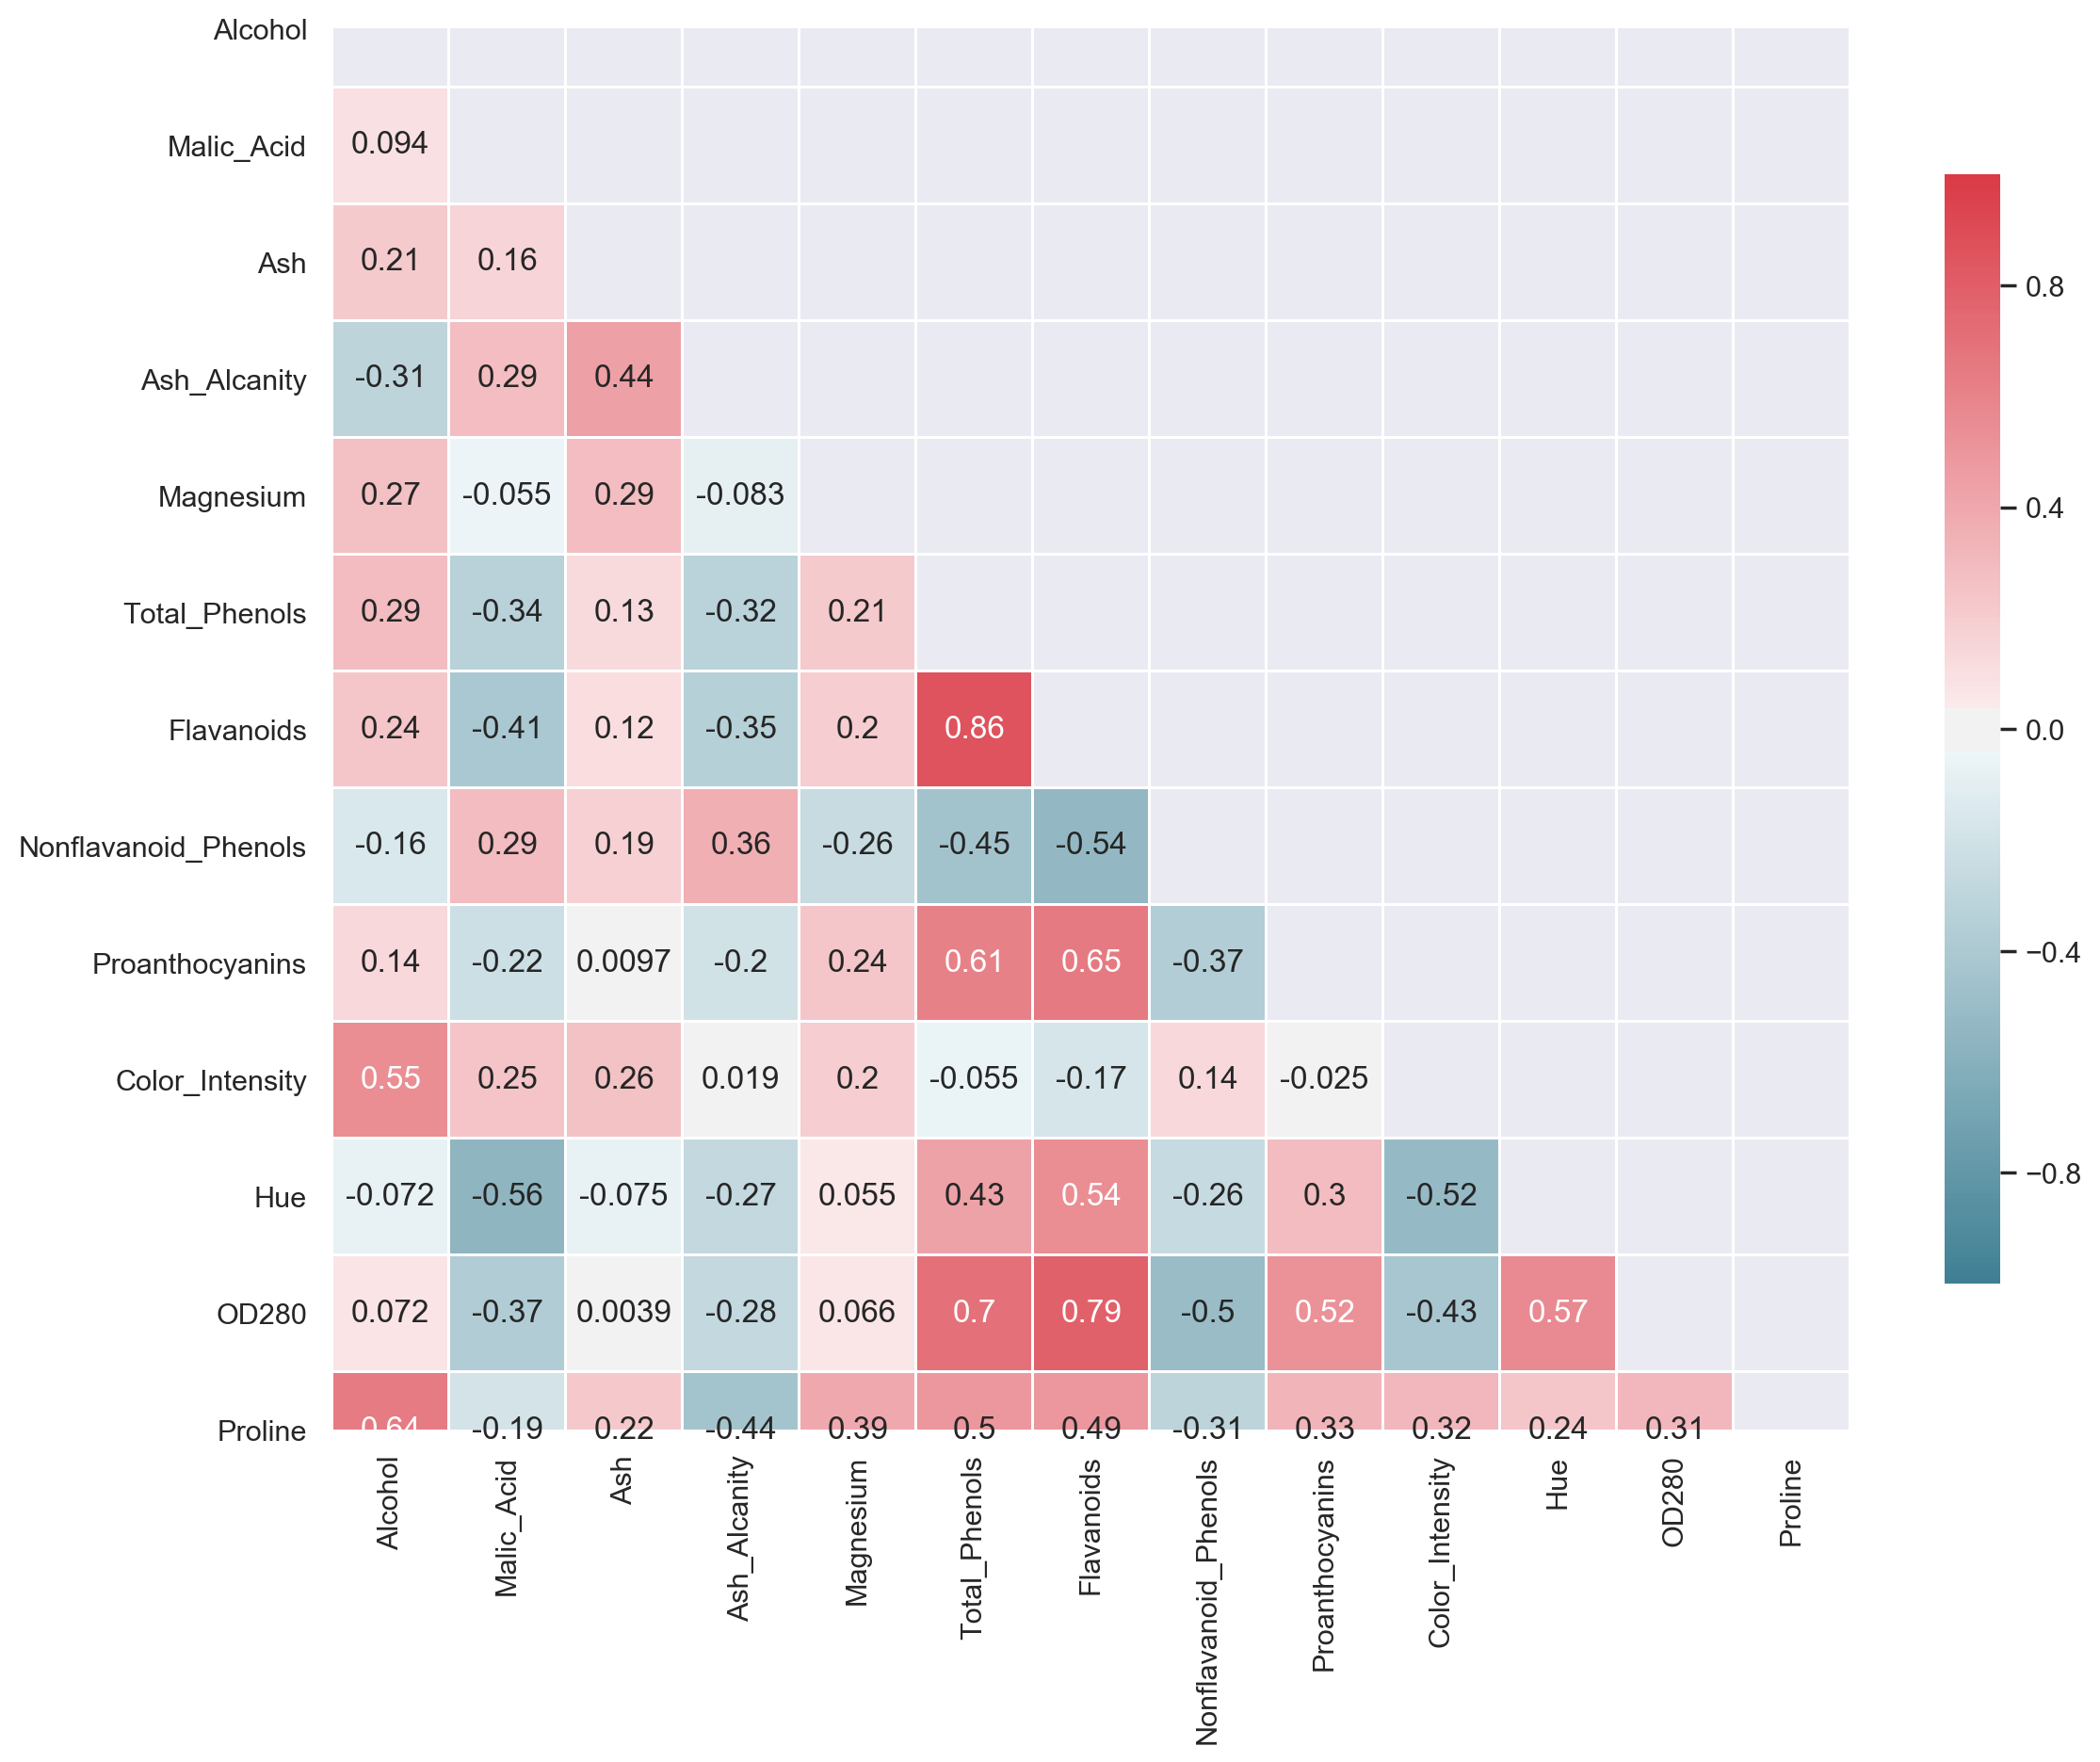

In [8]:
# Run correlation tests for variables 
sns.set()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(13,13),dpi=200)
corr = wine.corr()
# Mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

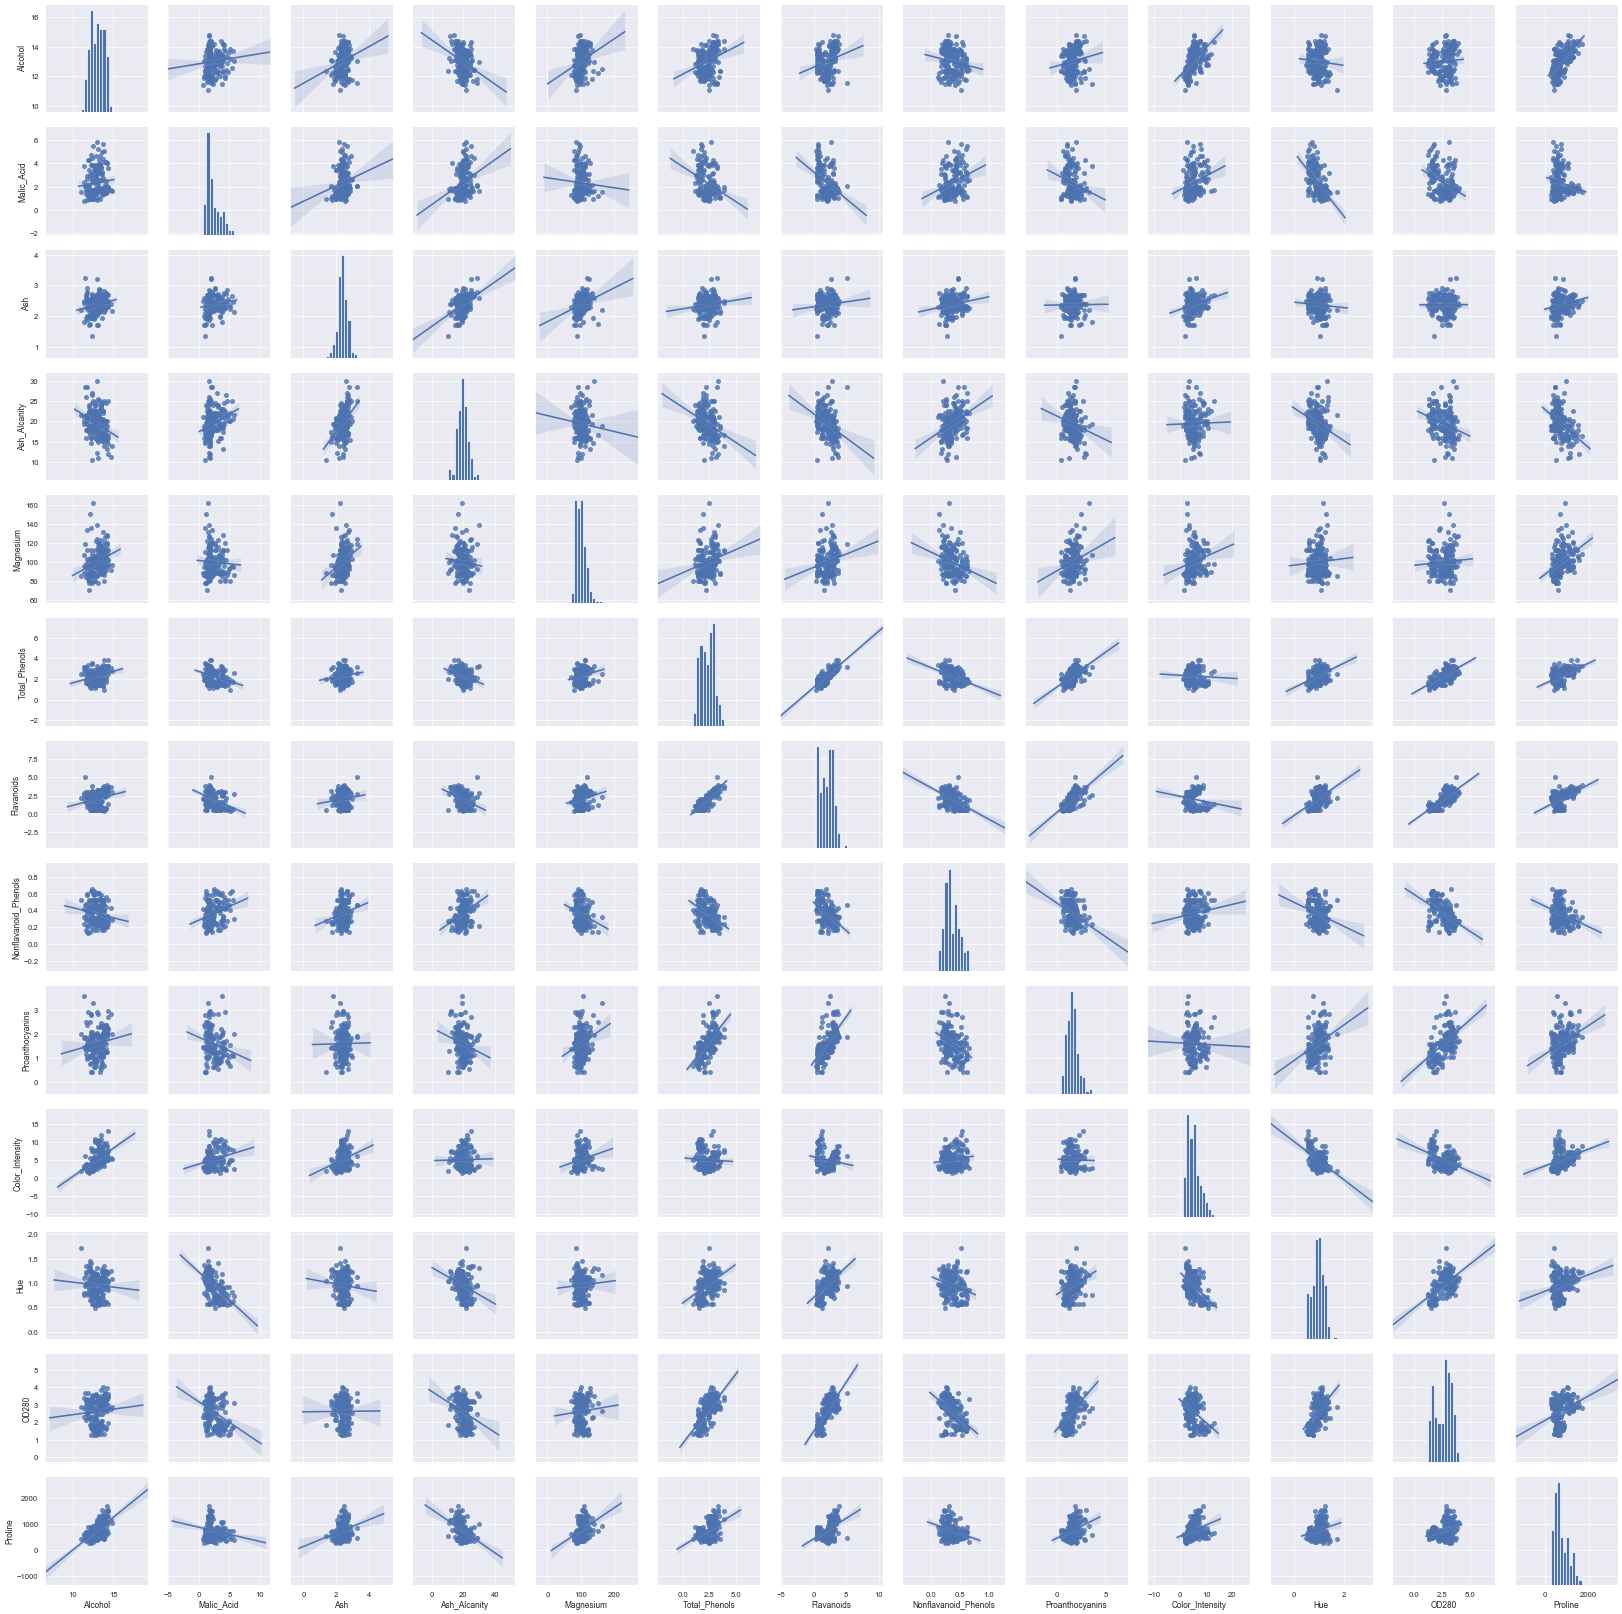

In [9]:
#Pairwise scatter plot
pairwise = sns.pairplot(wine, kind = "reg")

In [10]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine)
norm_wine = pd.DataFrame((scaler.transform(wine)),columns=wine.columns)
norm_wine

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  
0    0.362177  1.847920  1.013009  
1    0.406051  1.113449  0.965242  
2    0.318304  0.788587  1.395148  
3   -0.427544  1.184071  2.334574  
4    0.362177  0.449601 -0.037874  
..        ...       ...       ...  
173 -1.392758 -1.231206 -0.021952  
174 -1.129518 -1.485445  0.009893  
175 -1.612125 -1.485445  0.280575  
176 -1.568252 -1.400699  0.296498  
177 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]

In [35]:
#Gaussian Mixture Model with 3 components
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(norm_wine)
gmm_cluster_label = gmm.predict(norm_wine)
gmm_cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
wine['gmm_cluster_label'] = gmm_cluster_label

Text(0.5, 0, 'n_components')

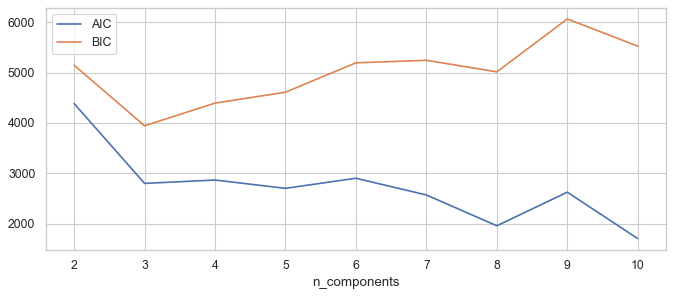

In [34]:
#Testing for AIC&BIC
n_components = np.arange(2, 11)
AIC=[]
BIC=[]
for n in n_components:
    models = GMM(n).fit(norm_wine)
    AIC.append(models.aic(norm_wine))
    BIC.append(models.bic(norm_wine))
plt.figure(figsize=(10,4),dpi=80)
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend()
plt.xlabel('n_components')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second principal component')

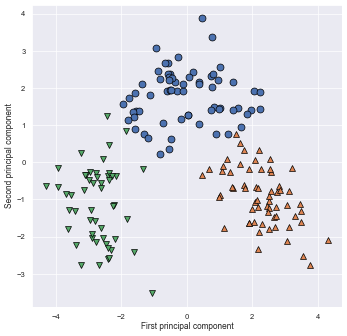

In [15]:
#PCA with GMM labels
from sklearn.decomposition import PCA
import mglearn
sns.set()
pca = PCA(n_components=2)
pca.fit(norm_wine)
x_pca = pca.transform(norm_wine)
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], wine.gmm_cluster_label)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [24]:
from matplotlib.patches import Ellipse
#Draw ellipsoids based on components' mean centers and covariances
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        


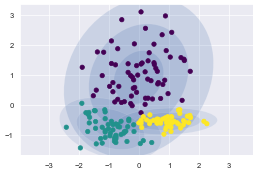

In [25]:
gmm = GMM(n_components=3)
plot_gmm(gmm, np.array([norm_wine.iloc[:,0],norm_wine.iloc[:,1]]).T)

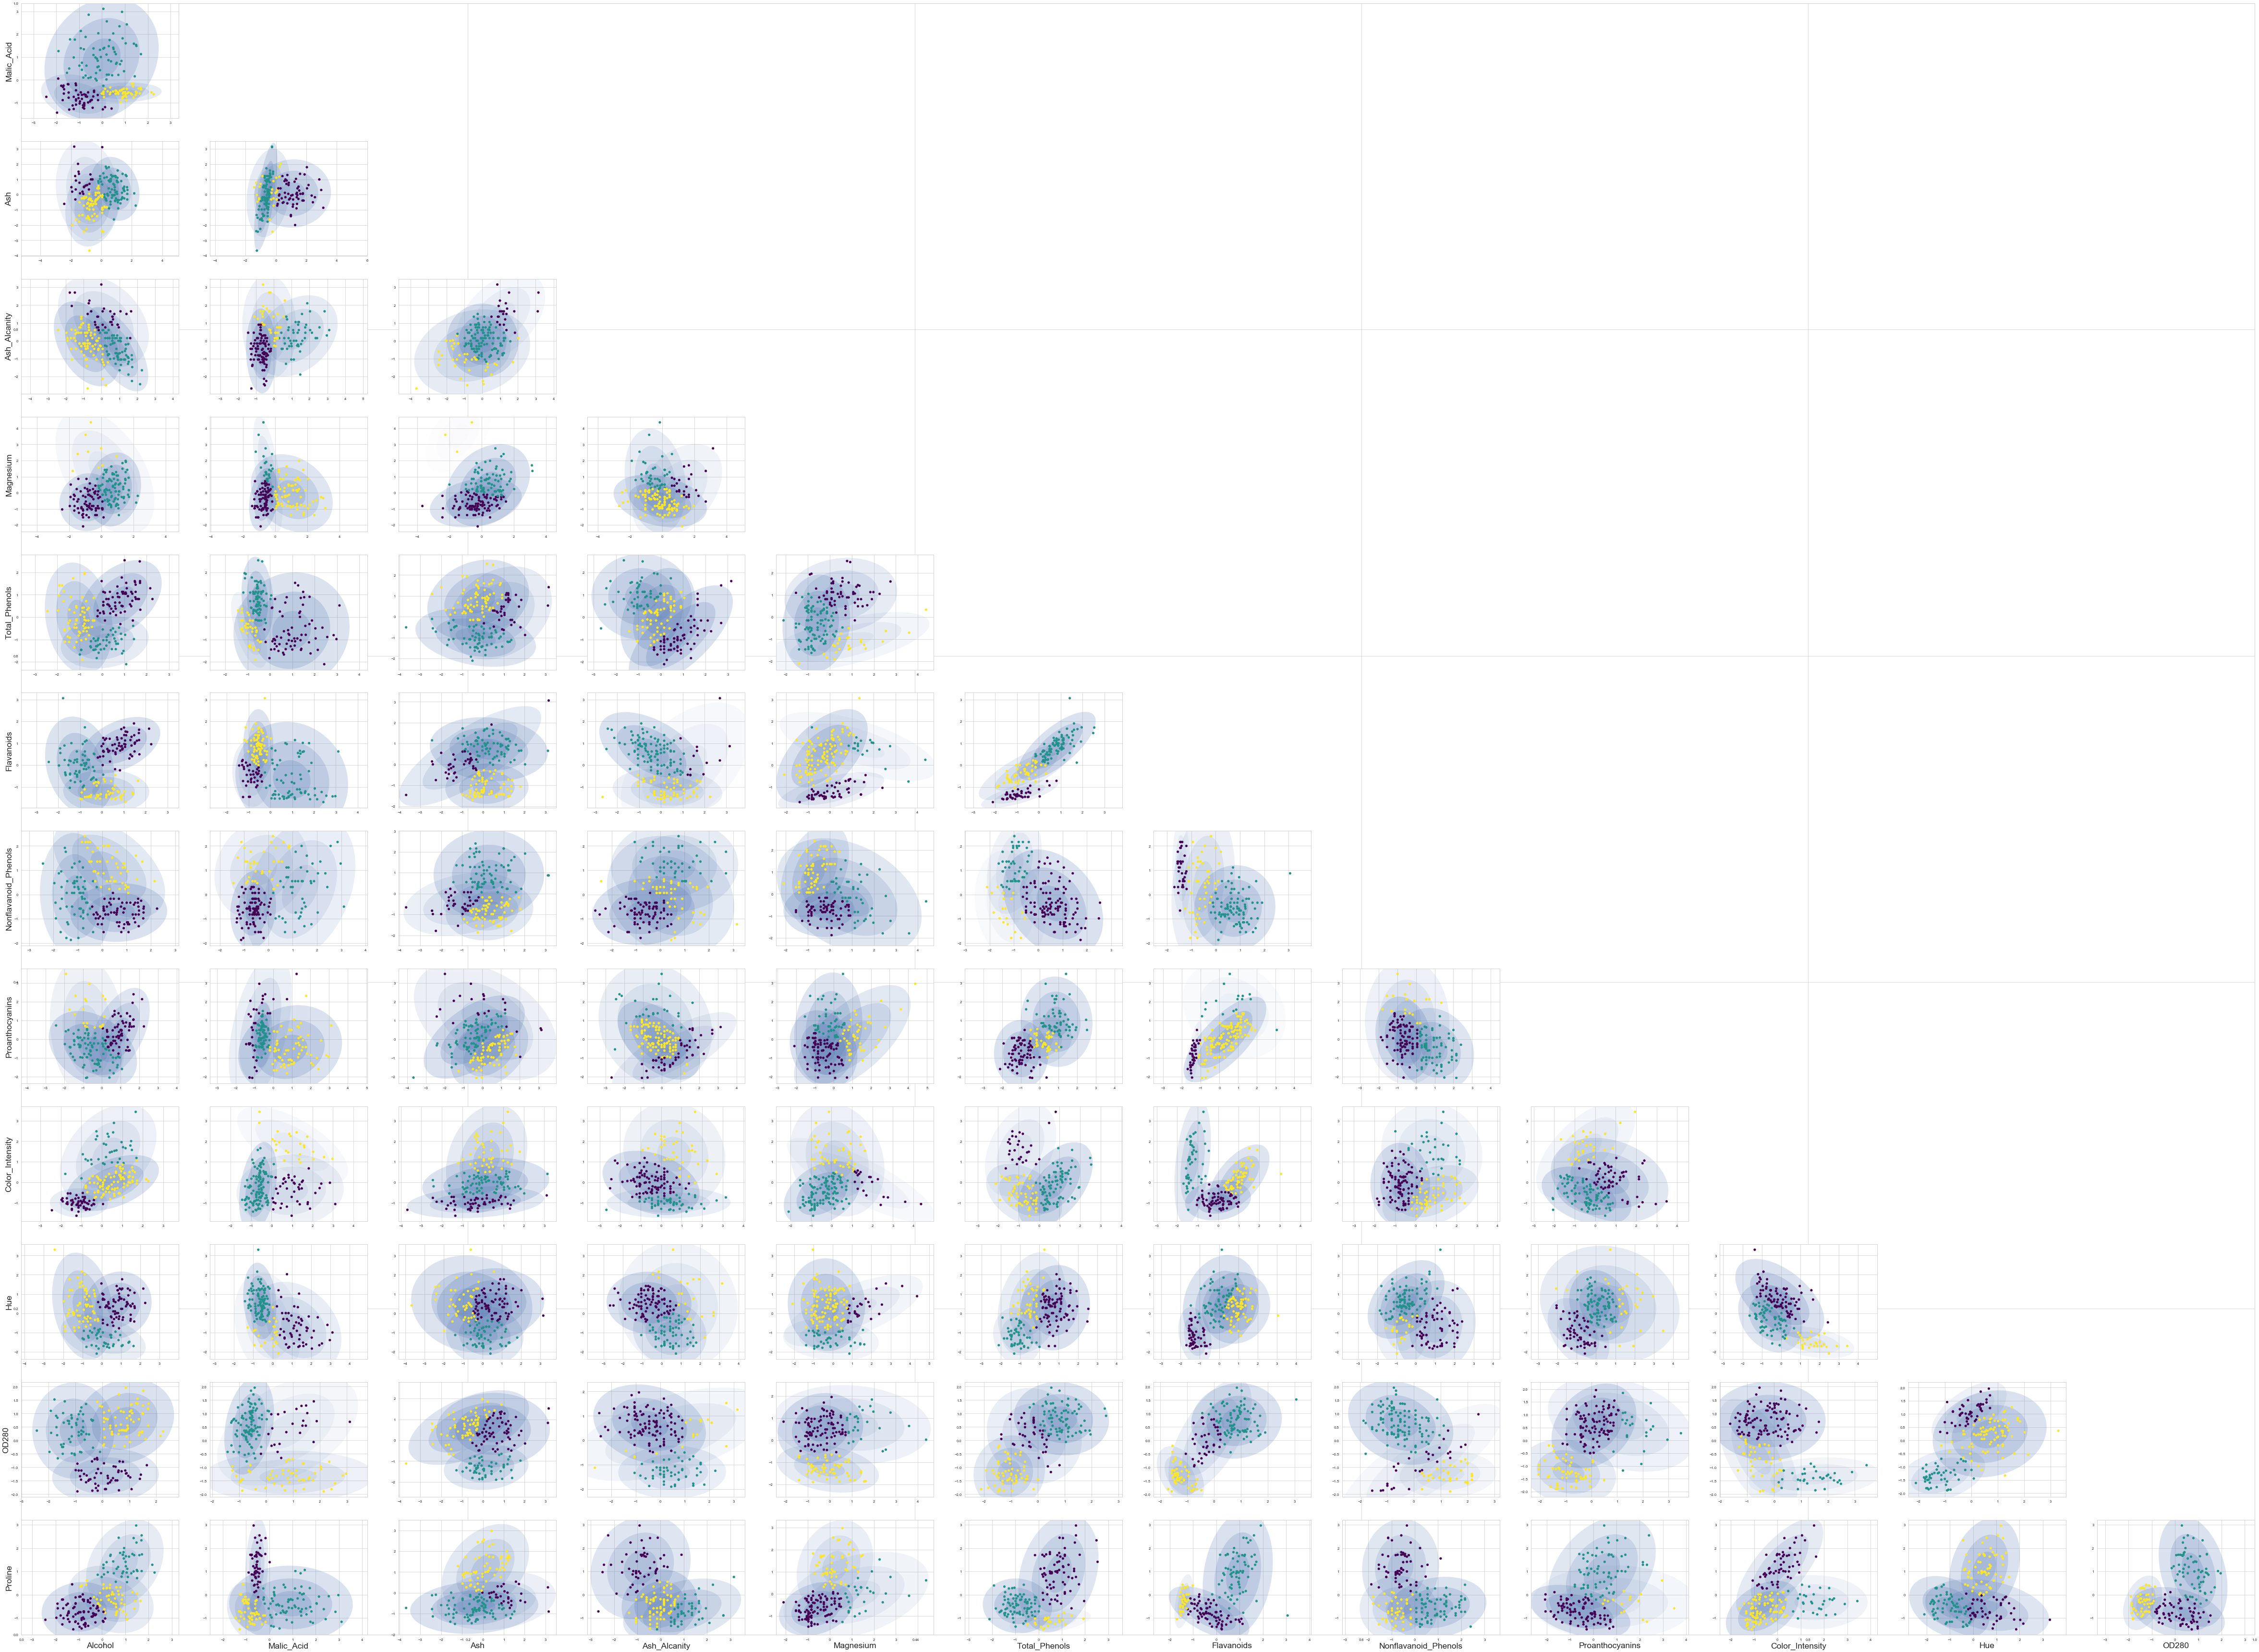

In [30]:
sns.set_style("whitegrid")
gmm = GMM(n_components=3)
fig, ax = plt.subplots(figsize=(120,90))
for i in range(12):
    for j in range(12):
        if i >= j:
            ax = fig.add_subplot(12, 12, j+12*i+1)
            plot_gmm(gmm,np.array([norm_wine.iloc[:,j],norm_wine.iloc[:,i+1]]).T)
        if j == 0:
            plt.ylabel(wine.columns[i+1],size=25)
        if j+12*i+1 > 132 :
            plt.xlabel(wine.columns[j],size=25)